# FIN:9160 | Individual Assignment 1

Spring 2022 | Student: Michael Lee

In [1]:
#Initial df setting
#Loading pandas and numpy
import pandas as pd
import numpy as np
#Read the data
df1=pd.read_csv("QQQ Dataset - 2008_01_01_2019_12_31.csv")
df1.sort_values(by='date', ascending=True, inplace=True)
df1.reset_index(inplace=True, drop=True)

In [2]:
#Convert date column from numeric type to datetime type.
df1["date"]=pd.to_datetime(df1["date"], format="%Y%m%d")
df1

,PERMNO,date,PRC,RET
0,86755,2008-01-02,50.45000,-0.015033
1,86755,2008-01-03,50.62000,0.003370
2,86755,2008-01-04,48.40000,-0.043856
3,86755,2008-01-07,48.17000,-0.004752
4,86755,2008-01-08,46.92000,-0.025950
...,...,...,...,...
3016,86755,2019-12-24,211.92000,0.000519
3017,86755,2019-12-26,213.78999,0.008824
3018,86755,2019-12-27,213.61000,-0.000842
3019,86755,2019-12-30,212.21001,-0.006554


In [3]:
#Calculate daily values of U for each trading day.
df1["U"]=np.nan
for i in range(1,len(df1)):
    if (df1["PRC"][i]-df1["PRC"][i-1] > 0):
        df1.loc[i,"U"]=df1["PRC"][i]-df1["PRC"][i-1]
    else:
        df1.loc[i,"U"]=0

In [4]:
#Calculate daily values of D for each trading day.
df1["D"]=np.nan
for i in range(1,len(df1)):
    if (df1["PRC"][i]-df1["PRC"][i-1] < 0):
        df1.loc[i,"D"]=df1["PRC"][i-1]-df1["PRC"][i]
    else:
        df1.loc[i,"D"]=0
df1

,PERMNO,date,PRC,RET,U,D
0,86755,2008-01-02,50.45000,-0.015033,NaN,NaN
1,86755,2008-01-03,50.62000,0.003370,0.17000,0.00000
2,86755,2008-01-04,48.40000,-0.043856,0.00000,2.22000
3,86755,2008-01-07,48.17000,-0.004752,0.00000,0.23000
4,86755,2008-01-08,46.92000,-0.025950,0.00000,1.25000
...,...,...,...,...,...,...
3016,86755,2019-12-24,211.92000,0.000519,0.11000,0.00000
3017,86755,2019-12-26,213.78999,0.008824,1.86999,0.00000
3018,86755,2019-12-27,213.61000,-0.000842,0.00000,0.17999
3019,86755,2019-12-30,212.21001,-0.006554,0.00000,1.39999


In [8]:
#Calculate Relative Strength (RS).
df1["sumU"] = df1["U"].rolling(window=22).sum()
df1["sumD"] = df1["D"].rolling(window=22).sum()
df1["RS"]= df1["sumU"]/df1["sumD"]
df1["RS"]= np.where(df1["sumD"]==0, 1000000, df1["RS"])
df1

,PERMNO,date,PRC,RET,U,D,sumU,sumD,RS,RSI
0,86755,2008-01-02,50.45000,-0.015033,NaN,NaN,NaN,NaN,NaN,NaN
1,86755,2008-01-03,50.62000,0.003370,0.17000,0.00000,NaN,NaN,NaN,NaN
2,86755,2008-01-04,48.40000,-0.043856,0.00000,2.22000,NaN,NaN,NaN,NaN
3,86755,2008-01-07,48.17000,-0.004752,0.00000,0.23000,NaN,NaN,NaN,NaN
4,86755,2008-01-08,46.92000,-0.025950,0.00000,1.25000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3016,86755,2019-12-24,211.92000,0.000519,0.11000,0.00000,15.95000,5.73000,2.783595,99.999900
3017,86755,2019-12-26,213.78999,0.008824,1.86999,0.00000,17.68999,5.73000,3.087258,99.999900
3018,86755,2019-12-27,213.61000,-0.000842,0.00000,0.17999,15.29999,5.90999,2.588835,72.135806
3019,86755,2019-12-30,212.21001,-0.006554,0.00000,1.39999,14.90999,7.30998,2.039676,67.101756


In [9]:
#Calculate Relative Strength Index (RSI).
df1["RSI"] = np.nan
for i in range(22,len(df1)):
        df1.loc[i,"RSI"] = 100-(100/(1+df1["RS"][i]))
df1

,PERMNO,date,PRC,RET,U,D,sumU,sumD,RS,RSI
0,86755,2008-01-02,50.45000,-0.015033,NaN,NaN,NaN,NaN,NaN,NaN
1,86755,2008-01-03,50.62000,0.003370,0.17000,0.00000,NaN,NaN,NaN,NaN
2,86755,2008-01-04,48.40000,-0.043856,0.00000,2.22000,NaN,NaN,NaN,NaN
3,86755,2008-01-07,48.17000,-0.004752,0.00000,0.23000,NaN,NaN,NaN,NaN
4,86755,2008-01-08,46.92000,-0.025950,0.00000,1.25000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3016,86755,2019-12-24,211.92000,0.000519,0.11000,0.00000,15.95000,5.73000,2.783595,73.570111
3017,86755,2019-12-26,213.78999,0.008824,1.86999,0.00000,17.68999,5.73000,3.087258,75.533721
3018,86755,2019-12-27,213.61000,-0.000842,0.00000,0.17999,15.29999,5.90999,2.588835,72.135806
3019,86755,2019-12-30,212.21001,-0.006554,0.00000,1.39999,14.90999,7.30998,2.039676,67.101756


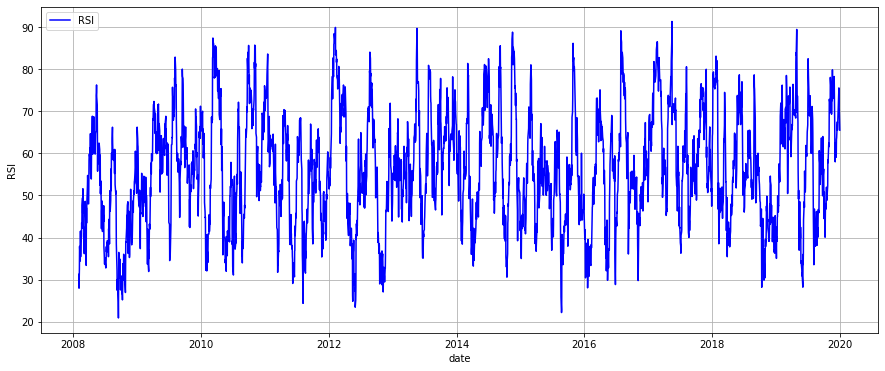

In [10]:
# Plot RSI
import matplotlib.pyplot as plt              
%matplotlib inline
plt.figure(figsize=(15, 6))
plt.plot(df1["date"], df1["RSI"], "b", label="RSI")
plt.legend(loc="upper left")
plt.xlabel("date")
plt.ylabel("RSI")
plt.grid(axis='both')
plt.show()